In [2]:
%autosave 0

Autosave disabled


In [3]:
!pip install grpcio==1.42.0 tensorflow-serving-api==2.7.0

  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.51.1
    Uninstalling grpcio-1.51.1:
      Successfully uninstalled grpcio-1.51.1


In [4]:
!pip install keras-image-helper

In [2]:
import grpc
import tensorflow as tf
from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2_grpc

In [3]:
from tensorflow.keras.preprocessing.image import load_img

In [4]:
host = 'localhost:8500'

channel = grpc.insecure_channel(host)

stub = prediction_service_pb2_grpc.PredictionServiceStub(channel)

In [5]:
from keras_image_helper import create_preprocessor

In [6]:
preprocessor = create_preprocessor('xception', target_size=(150, 150))

In [9]:
path = 'DL_weather/test/sunrise/sunrise286.jpg'

In [10]:
img = load_img(path, target_size=(150, 150))

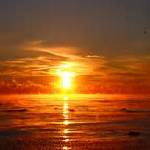

In [11]:
img

In [12]:
X = preprocessor.from_path(path)

In [13]:
def np_to_protobuf(data):
    return tf.make_tensor_proto(data, shape=data.shape)

In [17]:
pb_request = predict_pb2.PredictRequest()

pb_request.model_spec.name = 'weather-model'
pb_request.model_spec.signature_name = 'serving_default'

pb_request.inputs['input_13'].CopyFrom(np_to_protobuf(X))

In [21]:
pb_response = stub.Predict(pb_request, timeout=20.0)

In [23]:
preds = pb_response.outputs['dense_5'].float_val

In [24]:
classes = [
    '.ipynb_checkpoints',
    'cloudy',
    'rain',
    'shine',
    'sunrise'
]

In [25]:
dict(zip(classes, preds))

{'.ipynb_checkpoints': -18.23492431640625,
 'cloudy': 2.134681463241577,
 'rain': -5.190967082977295,
 'shine': -2.164445638656616,
 'sunrise': 8.420933723449707}